**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
![art8.png](art8.png)
art8lab1.png: 
![art8lab1.png](art8lab1.png)
art8lab2.png: 
![art8lab2.png](art8lab2.png)

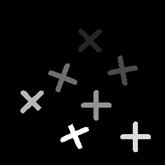
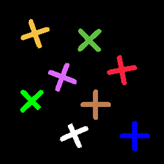
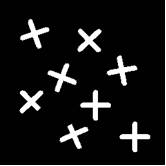

In [208]:
# importando bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sns as sns


#Defining the ImageProcessor Class
class ImageProcessor:
    def __init__(self, img):
        self.img = img
        self.height = img.shape[0]
        self.width = img.shape[1]
        self.label = 1
        self.label_matrix = np.zeros((self.height, self.width), dtype=np.uint8)
        self.components = []

    def print_image(self):
        plt.imshow(self.img)
        plt.show()

    def print_label_matrix(self):
        plt.imshow(self.label_matrix, cmap="gray")
        plt.show()

    def _debug_image(self):
        print(self.img.shape)
        values, counts = np.unique(self.img, return_counts=True)
        print("Image has {} different values: ".format(len(values)) + ", ".join(str(v) for v in values))
        print("Counts: " + ", ".join(str(c) for c in counts))
        print(self.img)

    def _debug_components(self):
        print("There are {} components: ".format(len(self.components)))
        for i in range(len(self.components)):
            print("Component {}: ".format(i) + ", ".join(str(c) for c in self.components[i]))

    def _reset(self):
        self.label = 1
        self.label_matrix = np.zeros((self.height, self.width), dtype=np.uint8)
        self.components = []

    def _add_equivalence(self, label1, label2):
        eq_found = False
        comp = [label1, label2]
        for i in range(len(self.components)):
            if (label1 in self.components[i]) or (label2 in self.components[i]):
                eq_found = True
                self.components[i].extend(item for item in comp if item not in self.components[i])
                comp.clear()
                comp = self.components[i]

        if not eq_found:
            self.components.append([label1, label2])

    def _get_transitive_closure(self):
        return {item: max(sublist) for sublist in self.components if sublist for item in sublist}

    def _connect_n(self, n=4):
        self._reset()
        for i in range(self.height):
            for j in range(self.width):
                if self.img[i][j] == 255:
                    self._connect_pixel(i, j, n)

    def _connect_pixel(self, i, j, n):
        neighbors = [(i - 1, j), (i, j - 1)]

        if n == 8:
            neighbors.extend([(i - 1, j - 1), (i - 1, j + 1)])

        for ni, nj in neighbors:
            if self._is_valid_neighbor(ni, nj) and self.label_matrix[ni][nj] != 0:
                if self.label_matrix[i][j] == 0:
                    self.label_matrix[i][j] = self.label_matrix[ni][nj]
                else:
                    self._add_equivalence(self.label_matrix[ni][nj], self.label_matrix[i][j])

        if self.label_matrix[i][j] == 0:
            self.label_matrix[i][j] = self._get_new_label()
            self._add_equivalence(self.label_matrix[i][j], self.label_matrix[i][j])


    def _get_new_label(self):
        label = self.label
        self.label += 1
        return label

    def _is_valid_neighbor(self, i, j):
        return 0 <= i < self.height and 0 <= j < self.width

    def _solve_equivalence(self):
        self.components = [sublist for sublist in self.components if sublist]
        self._debug_components()
        dict_components = self._get_transitive_closure()
        for i in range(self.height):
            for j in range(self.width):
                if self.label_matrix[i][j] in dict_components:
                    self.label_matrix[i][j] = dict_components[self.label_matrix[i][j]]

    def get_components(self, neighborhood=4):
        self._connect_n(neighborhood)
        self._solve_equivalence()

    def show_image_results(self):
        # print(self.label_matrix)
        f, axarr = plt.subplots(1, 3, figsize=(20, 20))

        new_image = 255 - self.label_matrix[:]
        new_image[new_image == 255] = 1

        axarr[0].set_title('ART8')
        axarr[0].imshow(self.img, cmap='gray', vmin=0, vmax=255)

        axarr[1].set_title('ART8LAB1')
        axarr[1].imshow(new_image, cmap='gray', vmin=50, vmax=255)

        axarr[2].set_title('ART8LAB2')
        axarr[2].imshow(new_image, cmap='gnuplot2', vmin=1, vmax=255)

    def export_to_file(self, filename):
        with open(filename, 'w') as file:
            for row in self.label_matrix:
                file.write(' '.join(map(str, row)) + '\n')


There are 8 components: 
Component 0: 18, 18, 17, 16, 15, 14, 11, 8, 6, 5, 3, 4, 2, 1
Component 1: 20, 20, 19, 13, 12, 10, 9, 7
Component 2: 35, 35, 32, 33, 25, 24, 23
Component 3: 36, 36, 34, 31, 30, 29, 28, 27, 26, 22, 21
Component 4: 43, 43, 42, 39, 41, 38
Component 5: 45, 45, 44, 40, 37
Component 6: 63, 63, 61, 47, 46
Component 7: 67, 67, 66, 65, 64, 62, 60, 59, 58, 57, 56, 55, 54, 52, 53, 51, 50, 49, 48


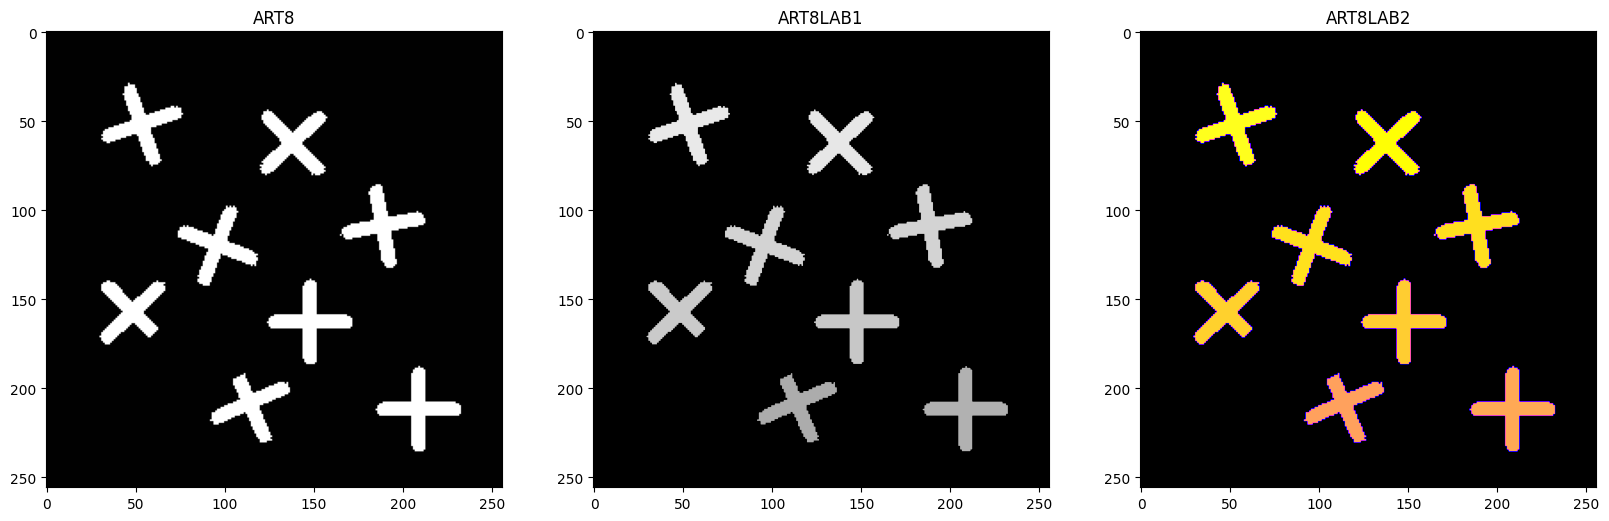

In [209]:
#importing image
img = cv2.imread("art8.png", cv2.IMREAD_GRAYSCALE)
img_processor = ImageProcessor(img)
img_processor.get_components(neighborhood=8)
img_processor.show_image_results()
img_processor.export_to_file("art8lab1.txt")

In [182]:
cmaps = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

In [ ]:
# code here
